In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Micro\Downloads\perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns = ['Month', 'Sales']
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.drop(106,axis=0, inplace= True)
df.drop(105,axis=0, inplace= True)

In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.tail()

,Month,Sales
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0
104,1972-09-01,5877.0


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(Sales):
    result = adfuller(Sales)
    labels = ['ADF Test Statistic','p-value','Lags used','Number of Observation Used']
    for value,label in zip(result,labels):
        print(label+ ' : '+str(value))
    if result[1]>=0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276175
p-value : 0.3639157716602477
Lags used : 11
Number of Observation Used : 93
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [12]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(10)

In [13]:
df.head()

,Month,Sales,Seasonal First Difference
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,NaN
2,1964-03-01,2755.0,NaN
3,1964-04-01,2721.0,NaN
4,1964-05-01,2946.0,NaN


In [14]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.6821939340098844
p-value : 0.44030925760785367
Lags used : 12
Number of Observation Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

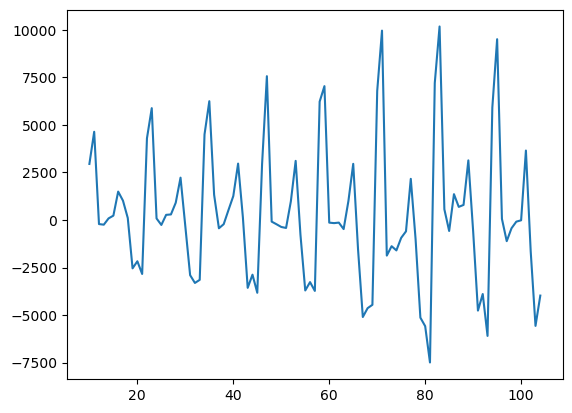

In [15]:
df['Seasonal First Difference'].plot()

In [16]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df['Sales'],order = (1,1,1),seasonal_order = (1,1,1,12))
result = model.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 17 Nov 2023   AIC                           1486.804
Time:                                    23:25:59   BIC                           1499.413
Sample:                                         0   HQIC                          1491.893
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

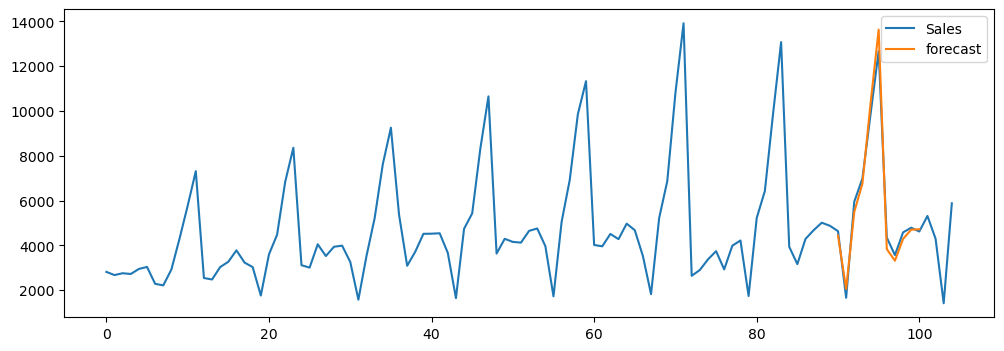

In [27]:
df['forecast']=result.predict(start=90,end=100,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,4))